<a href="https://colab.research.google.com/github/Pavan202020/AI-ML-Learning-Lab/blob/main/L1_Intro_To_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 26.4MB/s]


In [ ]:
mobile_sales = pd.read_excel('/content/mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [ ]:
mobile_sales

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0
...,...,...
212,2018-09-01,13838.0
213,2018-10-01,15351.0
214,2018-11-01,15615.0
215,2018-12-01,16941.0


In [ ]:
mobile_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [ ]:
mobile_sales["Sales"]

,Sales
0,6519.0
1,6654.0
2,7332.0
3,7332.0
4,8240.0
...,...
212,13838.0
213,15351.0
214,15615.0
215,16941.0


In [ ]:
mobile_sales.Sales.describe()

,Sales
count,198.000000
mean,10842.757576
std,2605.006293
min,108.000000
25%,8856.000000
50%,10745.000000
75%,12399.750000
max,23740.000000


In [ ]:
mobile_sales.DATE.describe()

,DATE
count,217
mean,2009-12-31 04:25:26.267281152
min,2001-01-01 00:00:00
25%,2005-07-01 00:00:00
50%,2010-01-01 00:00:00
75%,2014-07-01 00:00:00
max,2019-01-01 00:00:00


In [ ]:
2019 - 2001

18

In [ ]:
mobile_sales[mobile_sales.DATE.dt.year == 2001]

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0
5,2001-06-01,8104.0
6,2001-07-01,7813.0
7,2001-08-01,8279.0
8,2001-09-01,7014.0
9,2001-10-01,7985.0


In [ ]:
mobile_sales[mobile_sales.DATE.dt.year == 2019]

,DATE,Sales
216,2019-01-01,12160.0


In [ ]:
18 * 12  + 1

217

In [ ]:
mobile_sales.shape

(217, 2)

In [ ]:
mobile_sales.set_index('DATE', inplace=True)
mobile_sales

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


<Axes: xlabel='DATE'>

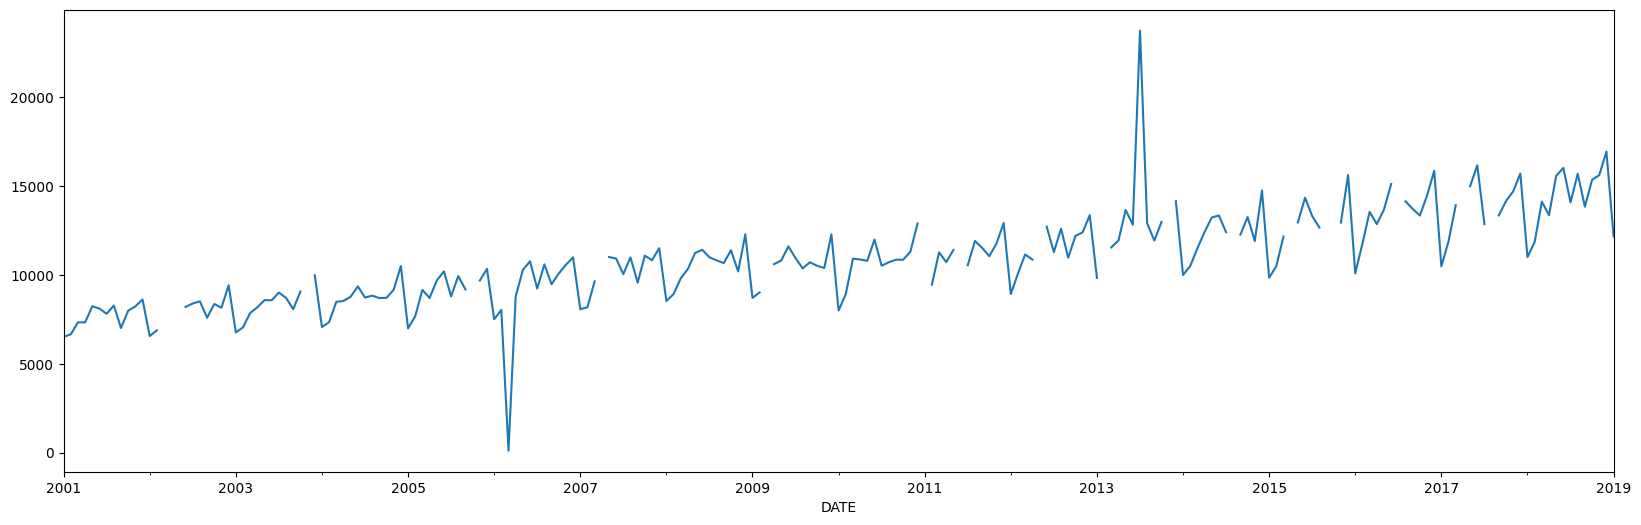

In [ ]:
mobile_sales.Sales.plot()

## Imputing Missing Values

In [ ]:
mobile_sales.isna().sum()

,0
Sales,19


In [ ]:
mobile_sales.loc[mobile_sales.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


In [ ]:
mobile_sales.Sales.mean()

np.float64(10842.757575757576)

In [ ]:
mobile_sales.Sales.median()

10745.0

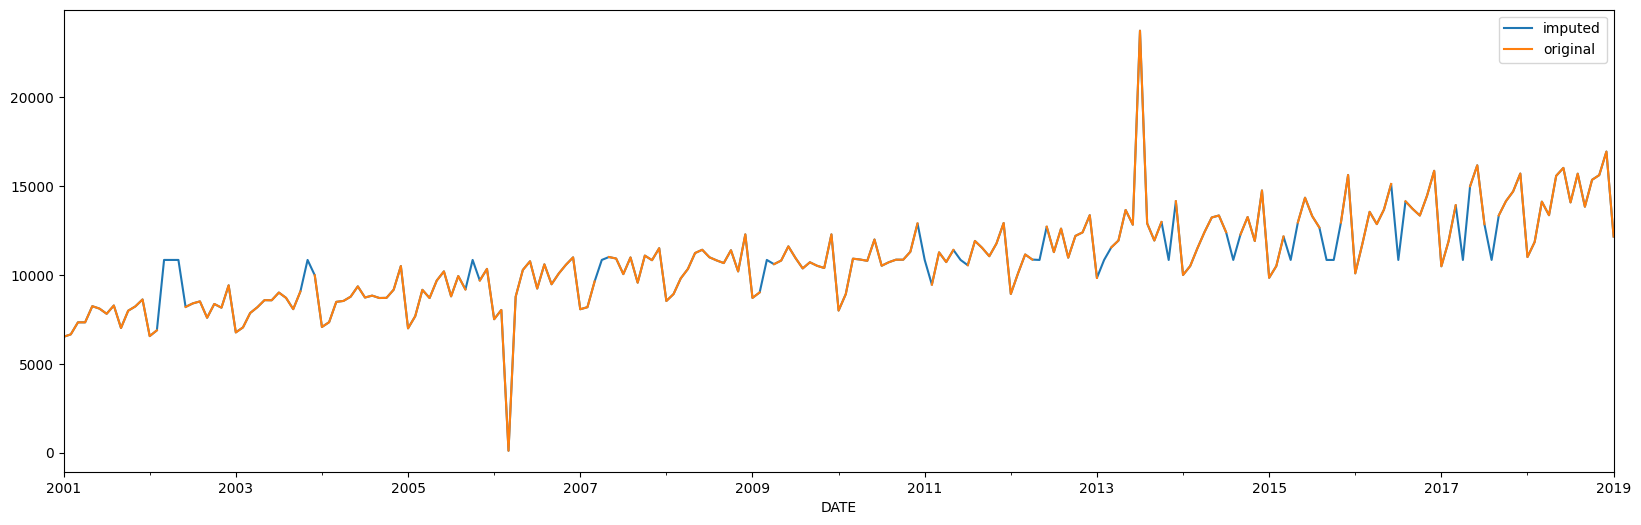

In [ ]:
mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

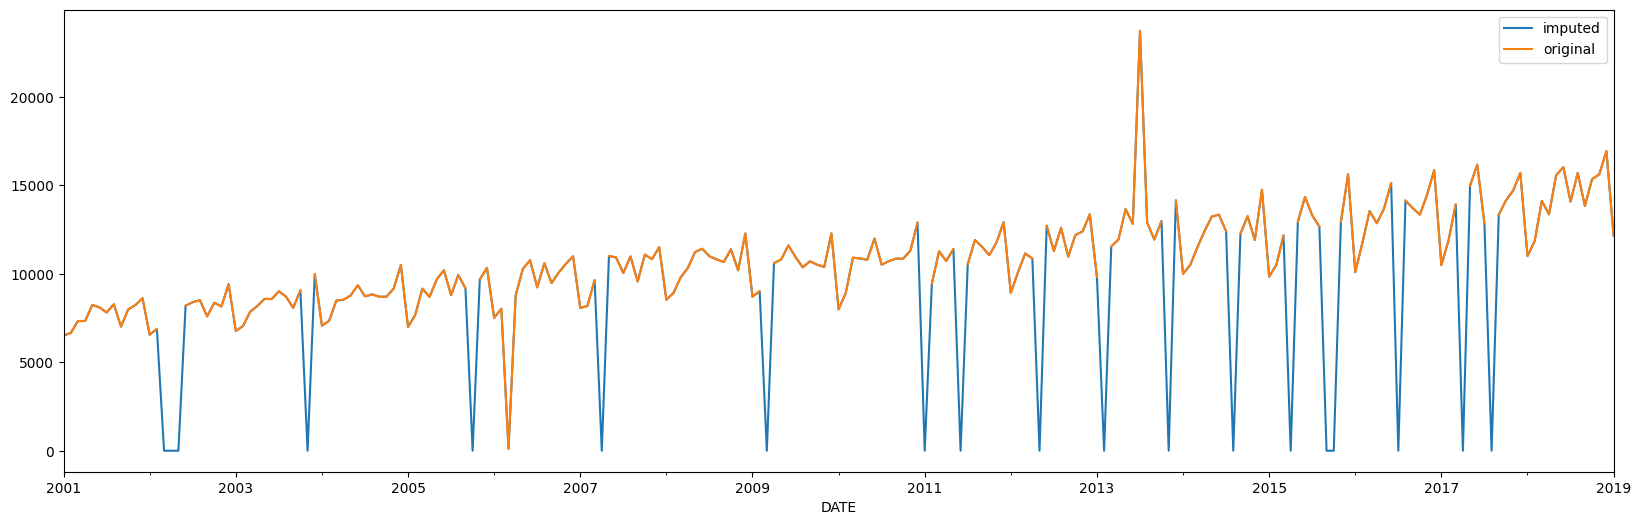

In [ ]:
mobile_sales.Sales.fillna(0).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

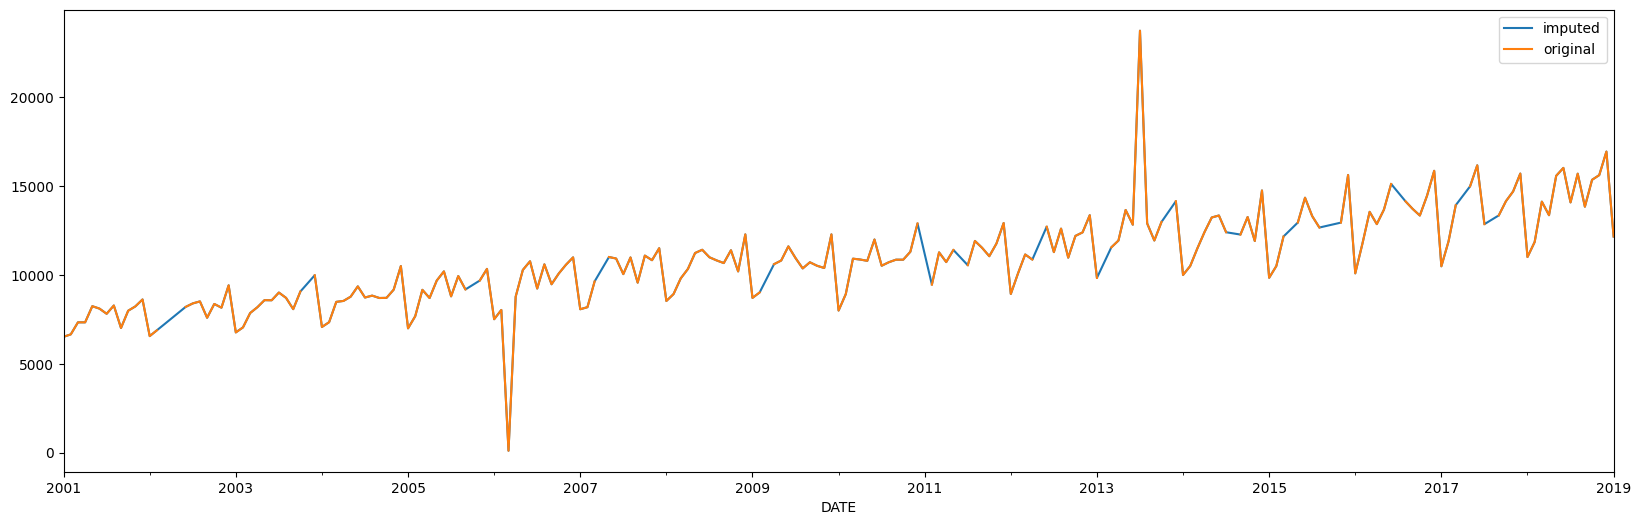

In [ ]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

## Anomalies

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

In [ ]:
mobile_sales.Sales.describe()

,Sales
count,217.000000
mean,10873.046083
std,2571.620954
min,108.000000
25%,8923.000000
50%,10793.000000
75%,12555.500000
max,23740.000000


In [ ]:
mobile_sales.Sales.quantile(0.95)

np.float64(15164.599999999997)

In [ ]:
mobile_sales.Sales.quantile(0.05)

np.float64(7307.8)

<Axes: xlabel='DATE'>

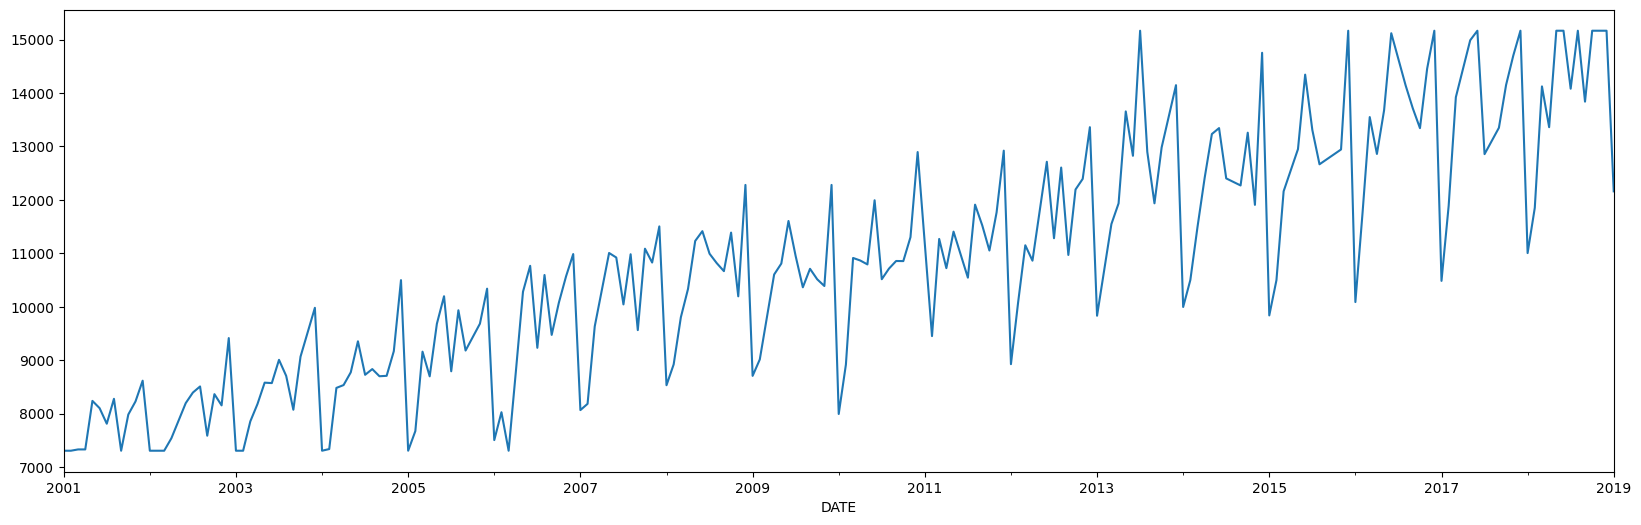

In [ ]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95), lower=mobile_sales.Sales.quantile(0.05)).plot()

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02))

<Axes: xlabel='DATE'>

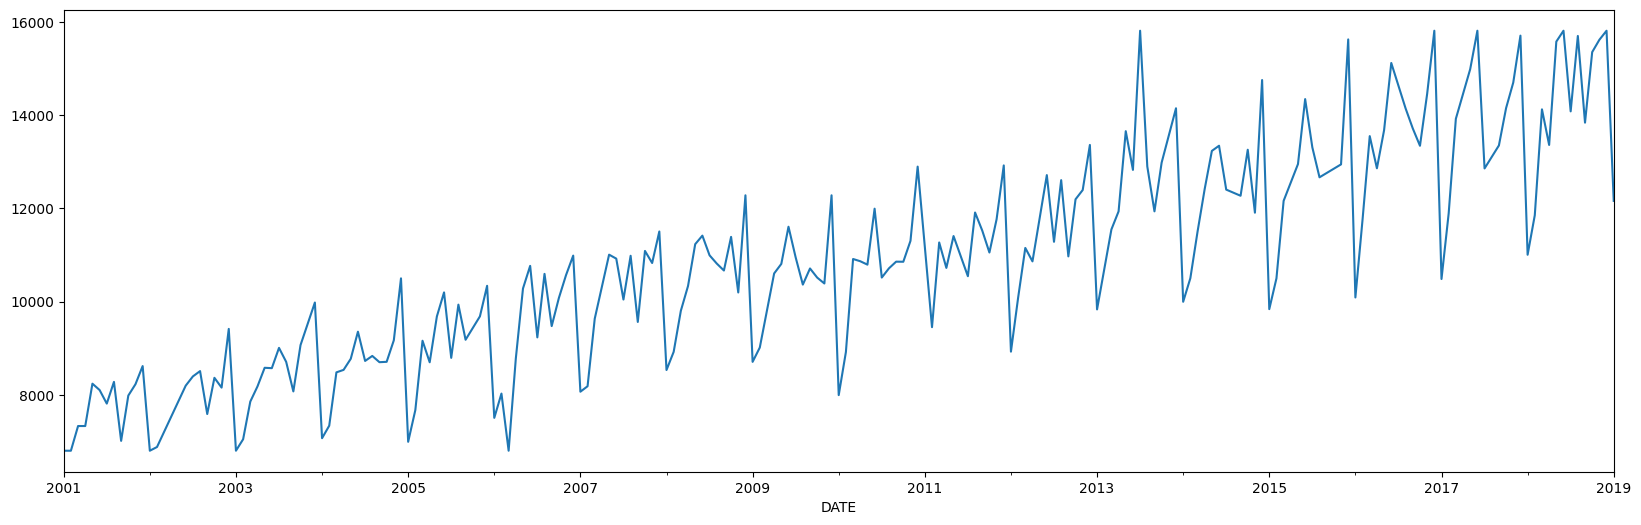

In [ ]:
mobile_sales.Sales.plot()

## Breaking down a time series


1. Does it have a trend? Is it growing or decreasing? Yes (Uptrend)

2. Are there any repeating patterns? Yes

## Moving Averages

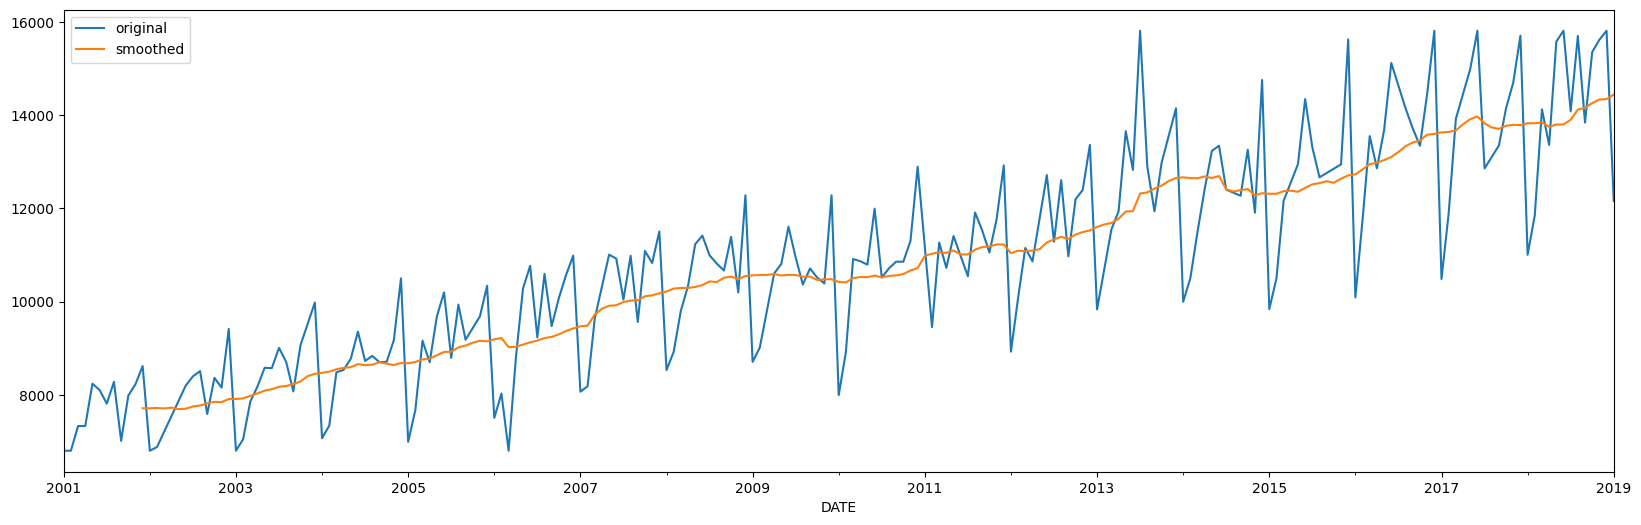

In [ ]:
# Plot original data
mobile_sales.Sales.plot(label='original')

# Plot data after implementing Moving Averages
mobile_sales.Sales.rolling(12, center=False).mean().plot(label='smoothed')

plt.legend()

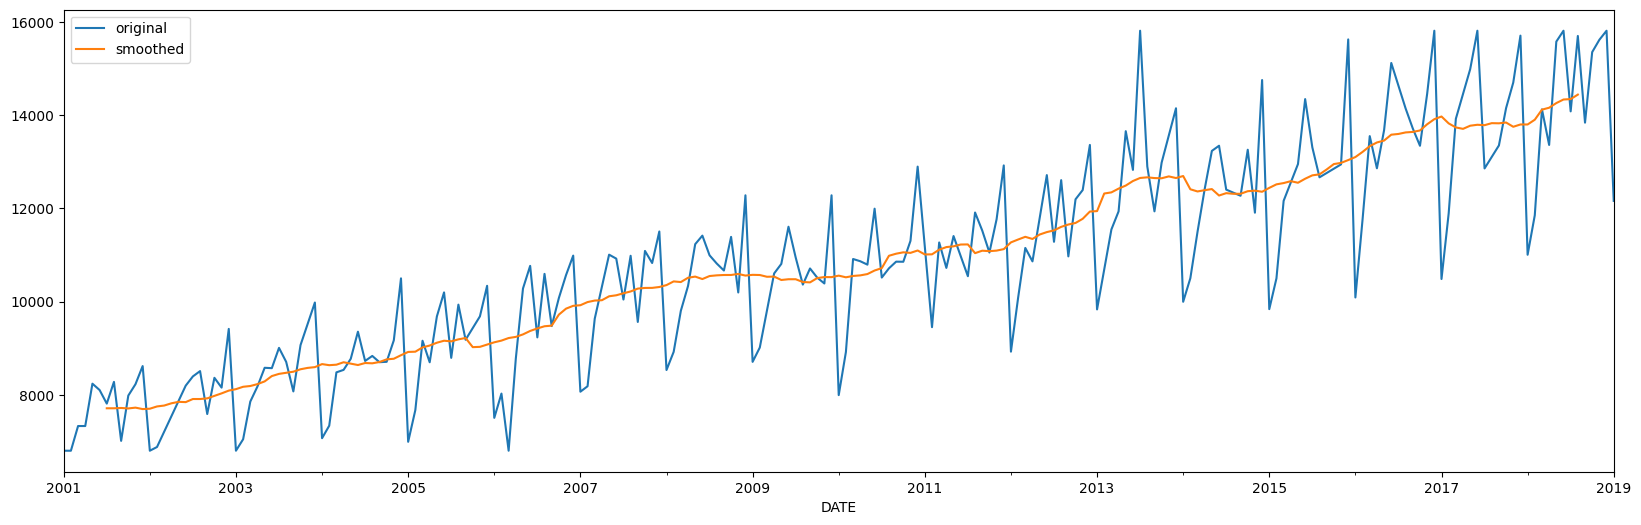

In [ ]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12, center=True).mean().plot(label='smoothed')
plt.legend()

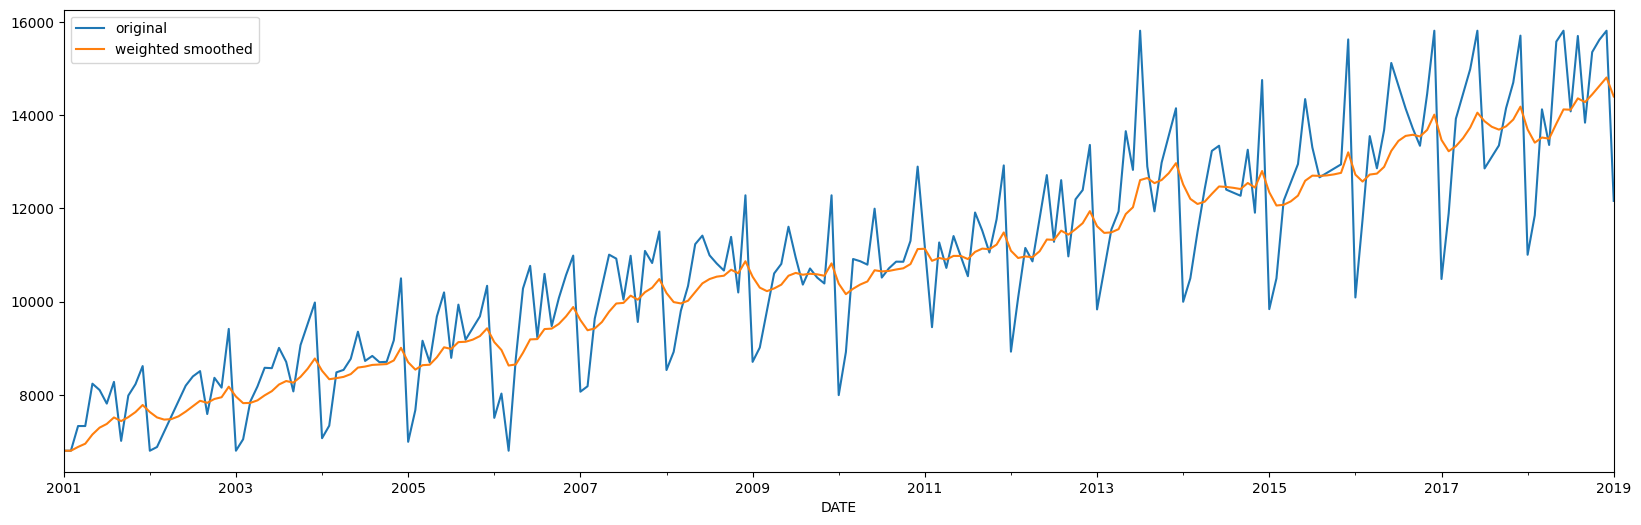

In [ ]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.ewm(span=12, adjust=False).mean().plot(label='weighted smoothed')
plt.legend()

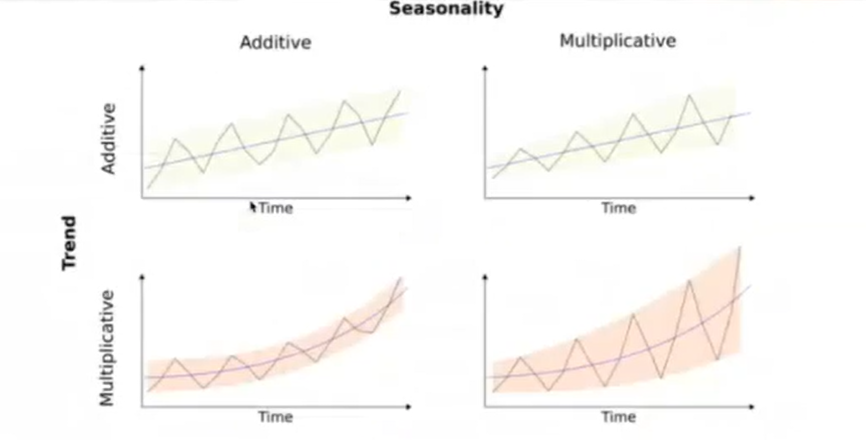

## Time Series Decomposition

In [ ]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

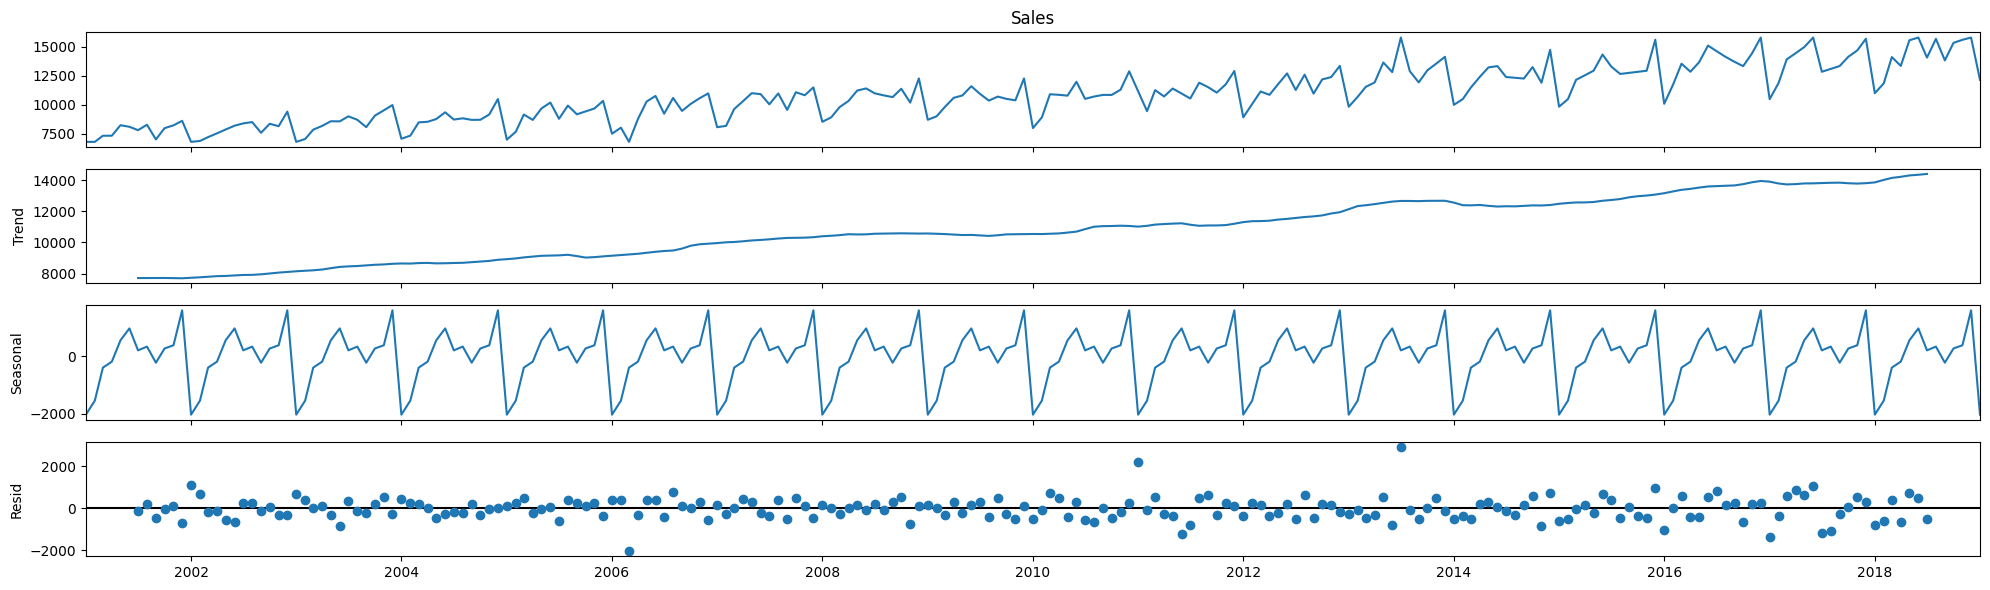

In [ ]:
model.plot()
plt.show()

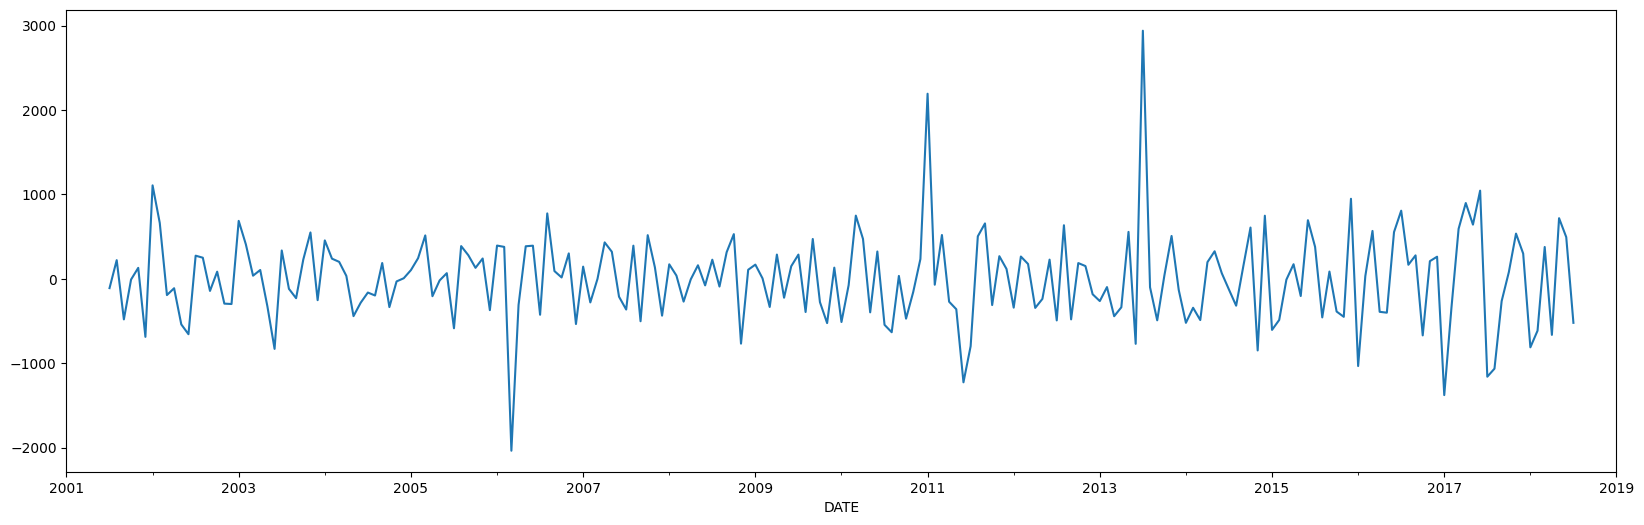

In [ ]:
model.resid.plot()
plt.show()

<Axes: >

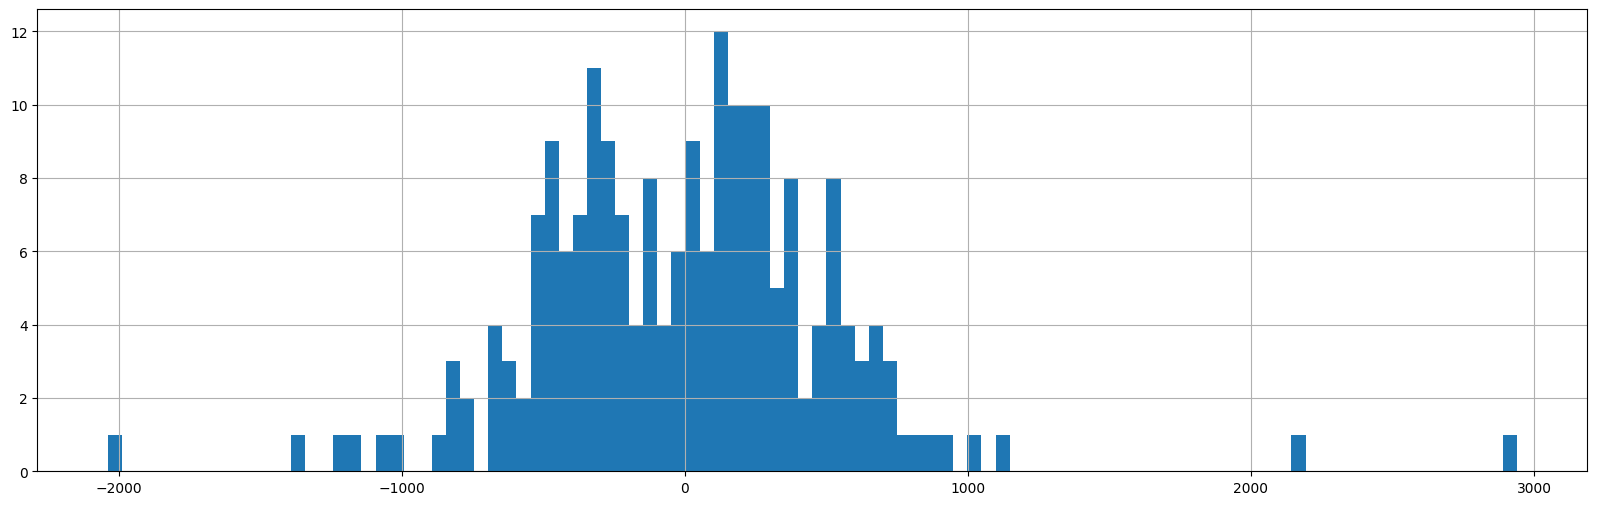

In [ ]:
model.resid.hist(bins=100)

In [ ]:
model.resid.mean()

np.float64(-3.2316417029771514)

## Generating forecast

In [ ]:
train_max_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,15809.4
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [ ]:
train_x['Sales'].mean()

np.float64(10653.201951219511)

MAE : 3786.031
RMSE : 4025.906
MAPE: 0.255


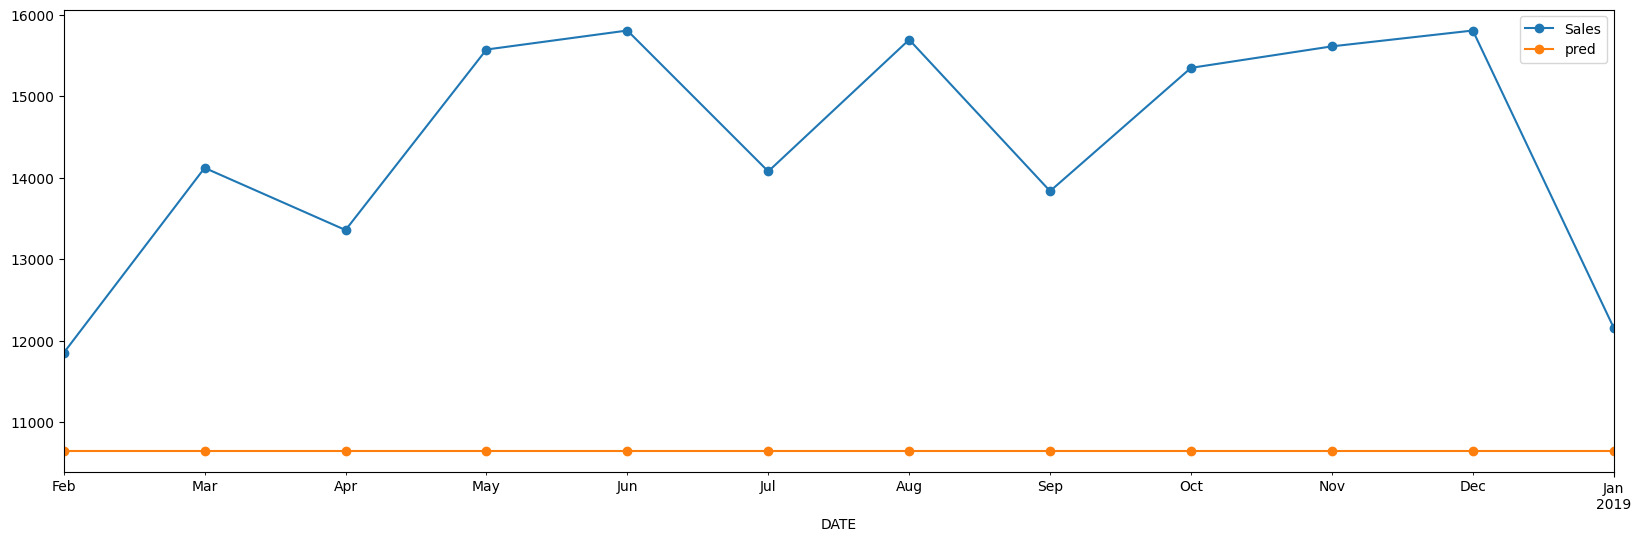

In [ ]:
test_x['pred'] = train_x['Sales'].mean()

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

In [ ]:
0.255 * 100

25.5

In [ ]:
# mape([100], [50]) * 100

In [ ]:
train_x['Sales'][-1]

/tmp/ipython-input-3296023292.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_x['Sales'][-1]


np.float64(11005.0)

/tmp/ipython-input-1534223991.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = train_x['Sales'][-1]


MAE : 3434.233
RMSE : 3697.005
MAPE: 0.23


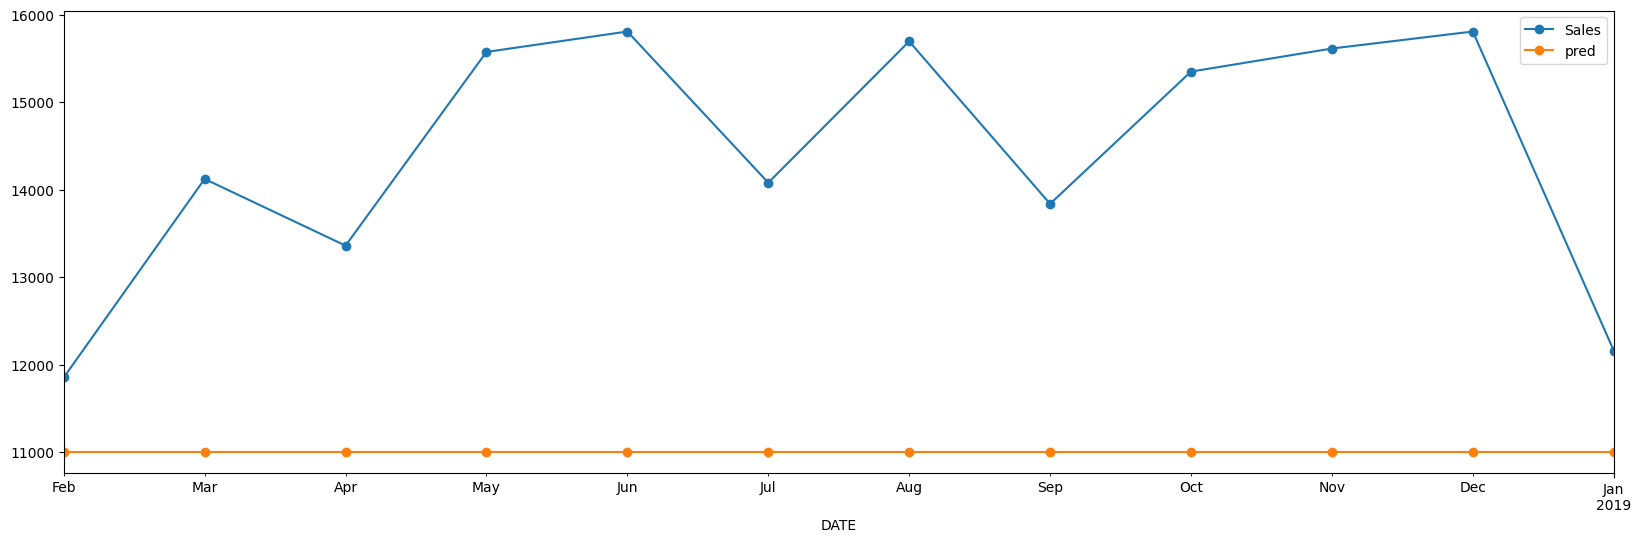

In [ ]:
test_x['pred'] = train_x['Sales'][-1]

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

In [ ]:
for i in test_x.index:
    test_x.loc[i, 'pred'] = train_x.loc[i - pd.DateOffset(years=1), 'Sales']

In [ ]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,11891.0
2018-03-01,14123.0,13921.0
2018-04-01,13360.0,14453.5
2018-05-01,15576.0,14986.0
2018-06-01,15809.4,15809.4
2018-07-01,14080.0,12856.0
2018-08-01,15697.0,13102.5
2018-09-01,13838.0,13349.0
2018-10-01,15351.0,14150.0


MAE : 800.867
RMSE : 1067.837
MAPE: 0.055


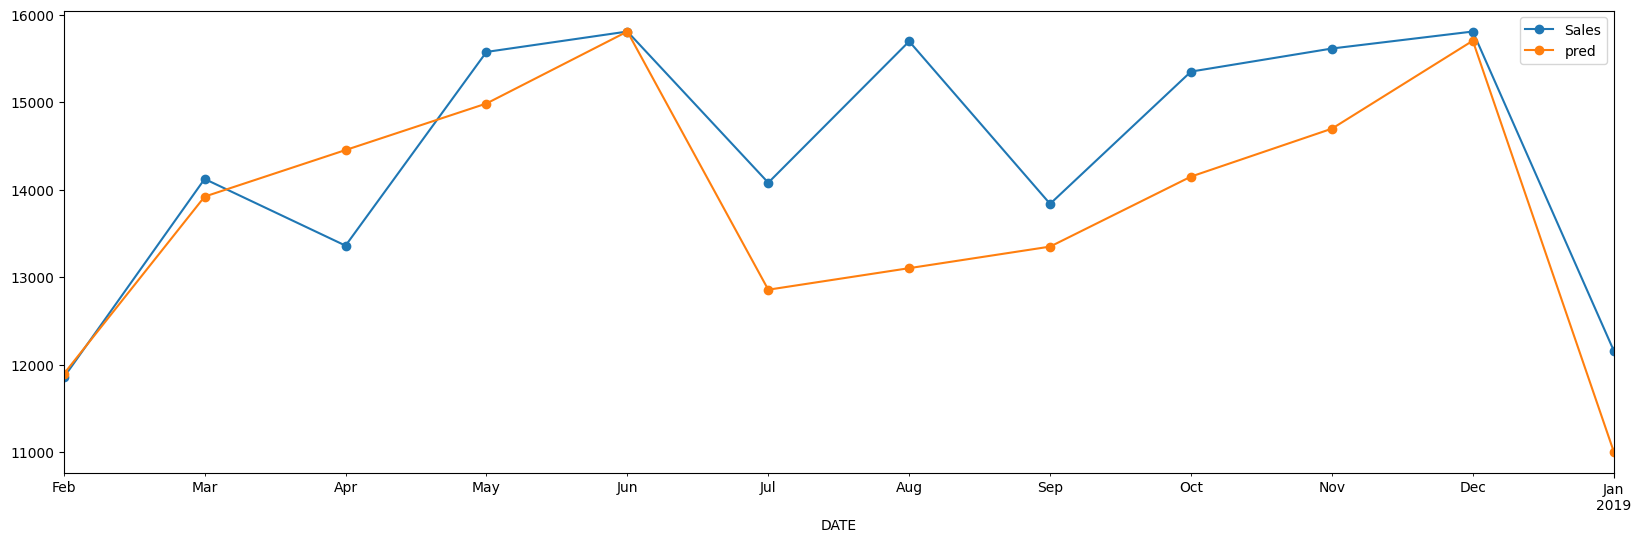

In [ ]:
test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

## Drift Method

What if instead of just picking up some value from the past, we let our values increase or decrease over time?

/tmp/ipython-input-2030675938.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t = train_x['Sales'][-1]
/tmp/ipython-input-2030675938.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = (y_t - train_x['Sales'][0]) / len(train_x)


MAE : 3321.482
RMSE : 3586.323
MAPE: 0.223


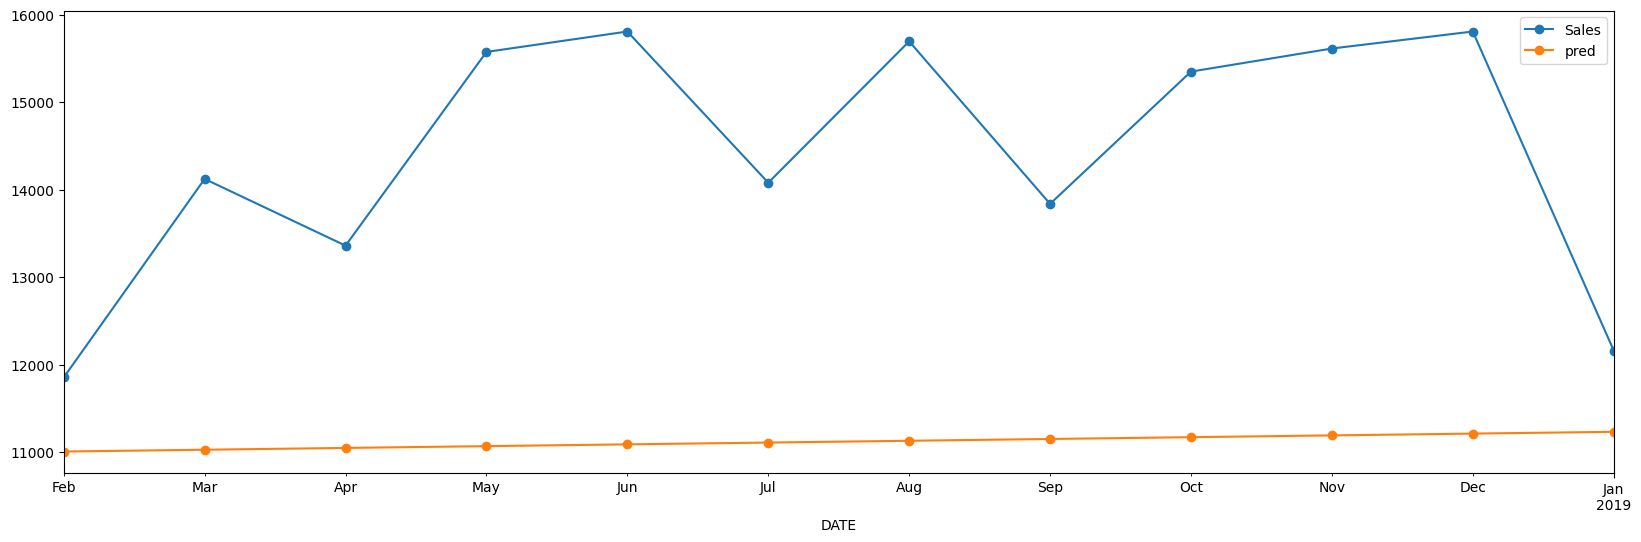

In [ ]:
# Get the slope
y_t = train_x['Sales'][-1]
m = (y_t - train_x['Sales'][0]) / len(train_x)
h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

/tmp/ipython-input-1723161111.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t = train_x['Sales'][-2]
/tmp/ipython-input-1723161111.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = (y_t - train_x['Sales'][0]) / len(train_x)


MAE : 1503.589
RMSE : 2013.071
MAPE: 0.115


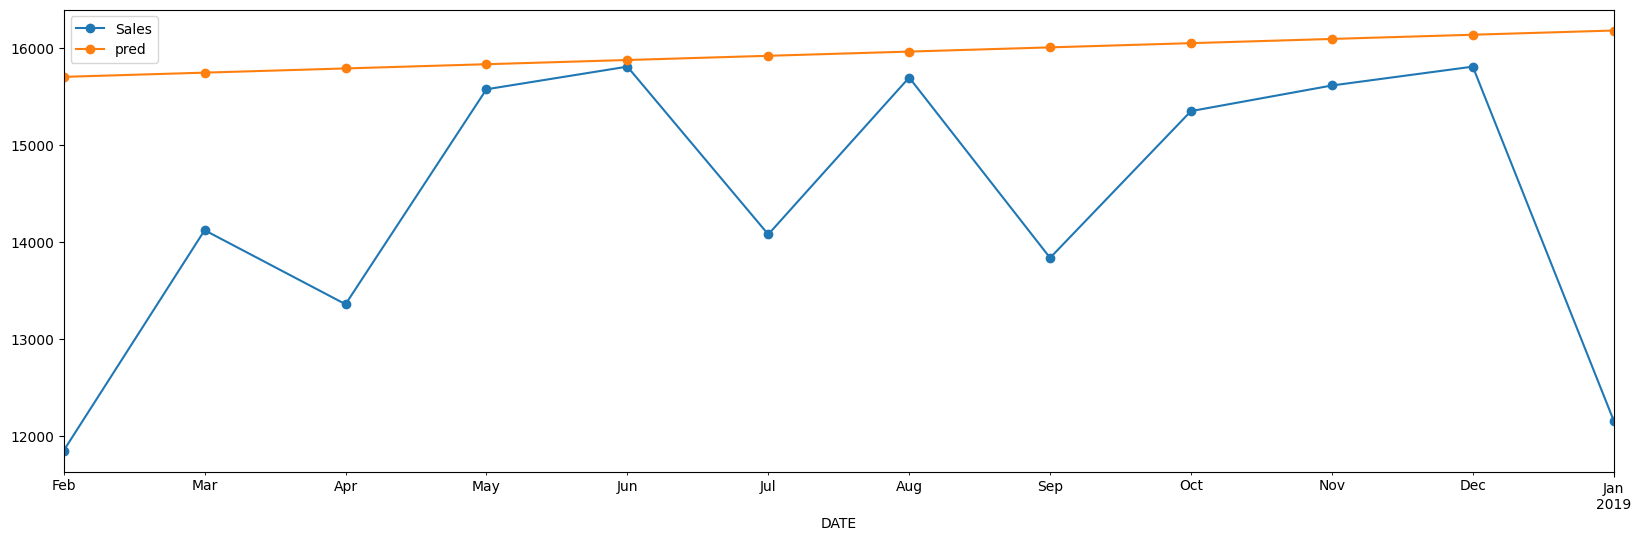

In [ ]:
# Get the slope
y_t = train_x['Sales'][-2]
m = (y_t - train_x['Sales'][0]) / len(train_x)
h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

In [ ]:
train_x['Sales'][-2]

/tmp/ipython-input-4116024165.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_x['Sales'][-2]


np.float64(15704.0)

In [ ]:
train_x['Sales'][-1]

/tmp/ipython-input-3296023292.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_x['Sales'][-1]


np.float64(11005.0)

## Quiz

1. Statement I: Naive method is capable of capturing seasonality.
2. Statement II: Forecasting with mean/median value will give a flat forecast around mean/median value
3. Statement III: Seasonal Naive is capable of capturing seasonality as well as trend.

- Which of the above statements is/are true?
- Ans: Statment 2 is true


## Smoothing Based Methods

In [ ]:
import numpy as np

df = mobile_sales.copy()

In [ ]:
df

,Sales
DATE,
2001-01-01,6802.44
2001-02-01,6802.44
2001-03-01,7332.00
2001-04-01,7332.00
2001-05-01,8240.00
...,...
2018-09-01,13838.00
2018-10-01,15351.00
2018-11-01,15615.00


In [ ]:
pd.DataFrame(index = pd.date_range(start=df.index[-1], periods=12,freq='MS'))

""
2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01


In [ ]:
df.index[-1]

Timestamp('2019-01-01 00:00:00')

In [ ]:
df = pd.concat([
    df,
    pd.DataFrame(index=pd.date_range(start=df.index[-1], periods=13, freq='MS')[1:])
])


In [ ]:
df.tail(20)

,Sales
2018-06-01,15809.4
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0
2018-12-01,15809.4
2019-01-01,12160.0
2019-02-01,NaN
2019-03-01,NaN


In [ ]:
df.Sales.tail(15)

,Sales
2018-11-01,15615.0
2018-12-01,15809.4
2019-01-01,12160.0
2019-02-01,NaN
2019-03-01,NaN
2019-04-01,NaN
2019-05-01,NaN
2019-06-01,NaN
2019-07-01,NaN
2019-08-01,NaN


In [ ]:
pred = df.Sales.dropna().values

for i in range(12):
  pred = np.append(pred, pred[-3:].mean())

pred[-20:]

array([15809.4       , 14080.        , 15697.        , 13838.        ,
       15351.        , 15615.        , 15809.4       , 12160.        ,
       14528.13333333, 14165.84444444, 13617.99259259, 14103.99012346,
       13962.6090535 , 13894.86392318, 13987.15436671, 13948.20911446,
       13943.40913479, 13959.59087199, 13950.40304041, 13951.13434906])

In [ ]:
pred = pred.round(1)
pred[-20:]

array([15809.4, 14080. , 15697. , 13838. , 15351. , 15615. , 15809.4,
       12160. , 14528.1, 14165.8, 13618. , 14104. , 13962.6, 13894.9,
       13987.2, 13948.2, 13943.4, 13959.6, 13950.4, 13951.1])

<Axes: >

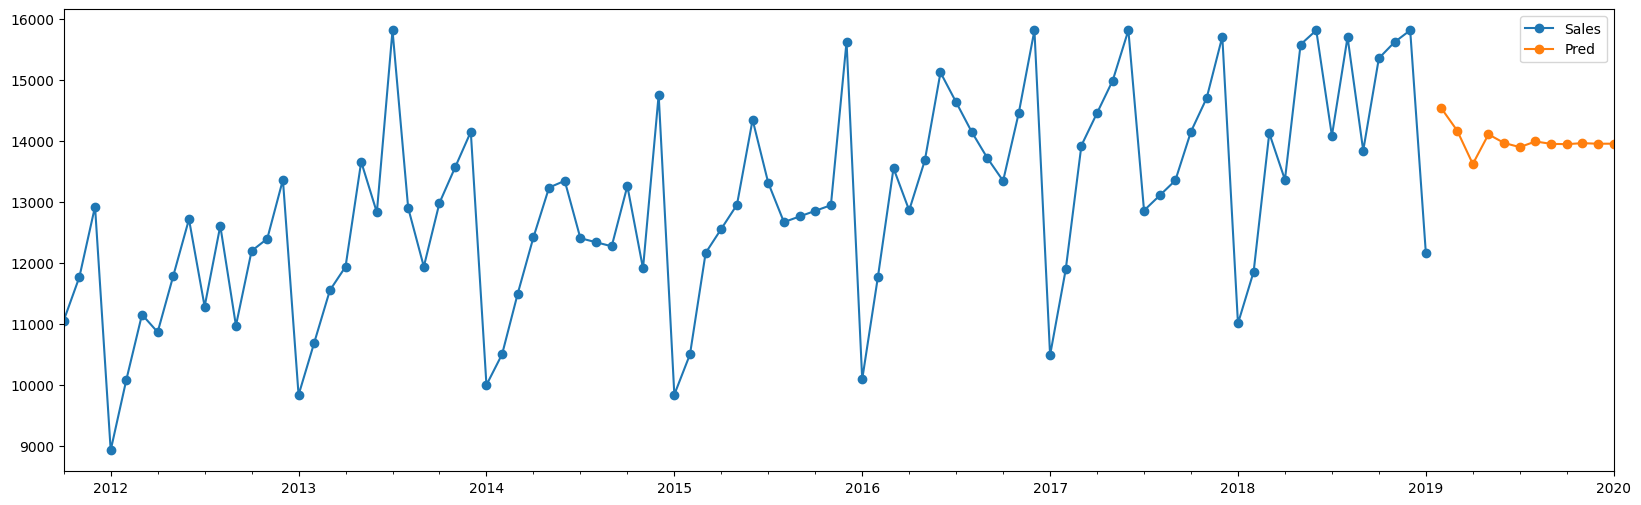

In [ ]:
df['Pred'] = pred

df.loc[~df['Sales'].isna(), 'Pred'] = np.nan
df.tail(100).plot(style='-o')

MAE : 1251.158
RMSE : 1504.515
MAPE: 0.088


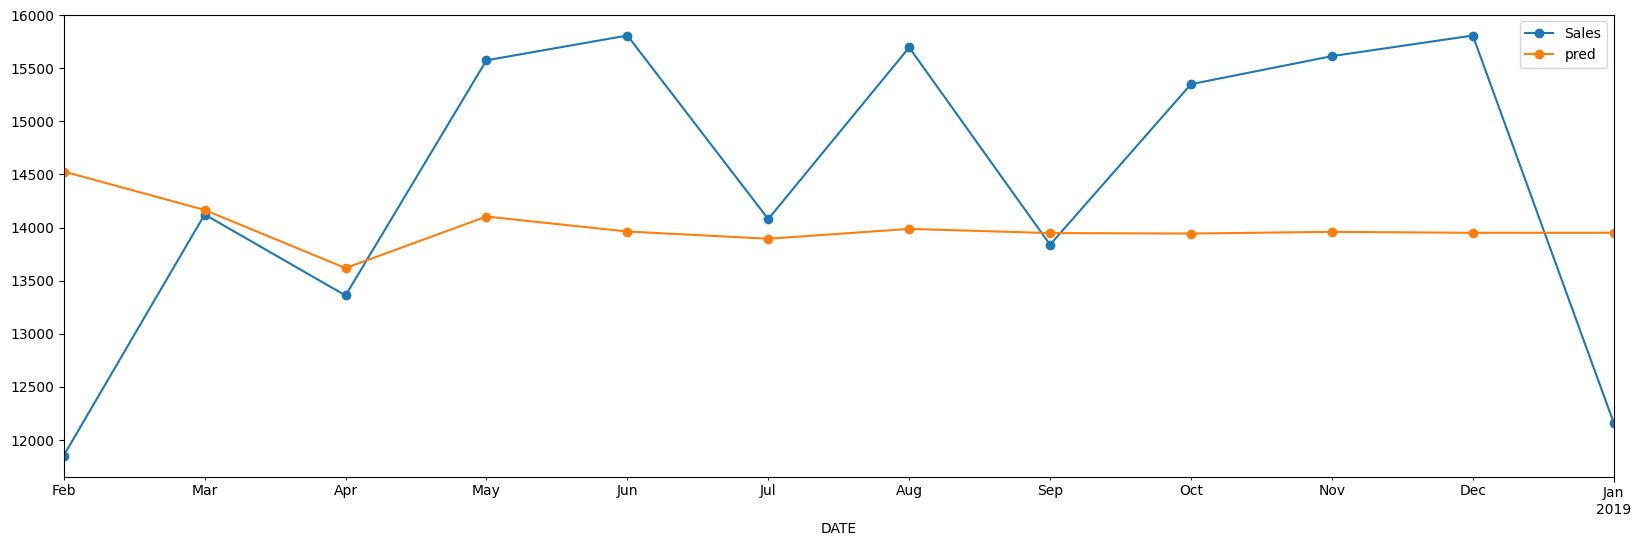

In [ ]:
test_x['pred'] = pred[-12:]
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [ ]:
df["Sales"].head()

,Sales
2001-01-01,6802.44
2001-02-01,6802.44
2001-03-01,7332.00
2001-04-01,7332.00
2001-05-01,8240.00
